# Machine Learning is a type of Artifical Intelligence

The field of Machine Learning can be further divided into 2 overall categories:
1. Supervised Learning
2. Unsupervised Learning
The main difference between these two areas of machine learning is the need for Labeled Training Data. In Supervised Learning, any data used must have a Label. These labels are the _ground truth_, which allows our supervised learning algorithms to 'check their work'.

![Machine Learning](new_ml-hierarchy.png)

# Supervised Learning

The term Supervised Learning refers to a class of machine learning algorithms that can "learn" a task through Labeled Training Data.
Whenever we're dealing with Supervised Learning, we have an Objective Function (also commonly called a Loss Function) that we're trying to optimize against. While classification and regression models use different kinds of Objective Functions to evaluate their performance, the concept is the same--these functions allow the model to evaluate exactly how right or wrong a prediction is, which the algorithm can then "learn" from. These objective functions serve an important purpose, because they act as the ground-truth for determining if our model is getting better or not.
Because Supervised Learning requires Labels for any data used, this severely limits the amount of available data we have for use with Supervised Learning algorithms. In supervised learning, labels are not universal--they are unique to the problem we're trying to solve.
Nowadays, when companies need to construct a dataset of labeled training data to solve a problem, they typically make use of services like Amazon's AWS Mechanical Turk[https://docs.aws.amazon.com/mturk/index.html], or 'MTurk' for short.
Positive Examples are data points that belong to the class we're training our model to recognize. To truly learn what we need it to learn, this model will also need to learn what a cat _isn't_, by looking at pictures that don't include cats--our Negative Examples. In this way, with a complex enough model and enough labeled training data, our classifier will eventually learn that the differentiating factor between images with positive labels and images with negative labels are the shapes and patterns common to cats, but not dogs.

## Probably Approximately Correct (PAC) Learning Theory

### Facts. 
- The function we are learning by building a regression based on our data may get close to the underlying Ground Truth, but it will never be perfect. Instead, our model is an approximation of the actual function that created the data we trained our model on, not the real thing. A lack of perfection doesn't mean our model is useless, however.
- We learn our model approximations from data gathered from the wild. Things from the wild are naturally subject to noise and randomness. This means that our models won't always be as trustworthy as we think they are, due to random chance affecting our data. 
- Our model is only as good as our data. Randomness may trick us with fewer data points, but with more, the odds are much lower. We learned about this concept when we studied Confidence Intervals -- the size of our confidence interval is dependent upon the size of our dataset, and the variance found within it. The important takeaway here is that although we can quantify our confidence in our model, we can never know with 100% certainty that the function approximation our model discovered actually approximates the ground truth function that describes the data in the real world -- there's always a nonzero chance, however small it may be, that our model might have learned an approximation that describes our sample (training data) and not the overall population.
"Probably: " If learner outputs the data with desired probability and confidence, the results are probably correct.
"Approximately: ." A hypothesis is approximately correct if its error over the distribution of inputs is bounded by some predefined interval.

### Error Calculation.
In PAC, we do not expect the learner to learn the exact function most of the time, due to limits on available examples and noise in the data etc. We expect the learner to find a function  ℎ  which is very close to the desired function  𝑓 . So we say that  ℎ  approximates  𝑓  , and that is a function we are interested in learning.
For PAC Learnability, the learner must find a concept  ℎ  such that the error between  ℎ  and  𝑓  with acceptable range with a predefined level of confidence. 
There is some probability distribution  𝐷 , defined in the sample sample  [0,1]|𝑛  giving probability of each example.
𝑒𝑟𝑟(ℎ,𝑓)≡𝑃𝑥∈𝐷(ℎ(𝑥)≠𝑓(𝑥))

### Relation to Machine Learning
PAC uses the term 'hypothesis',whereas ML literature normally uses the term 'model'. So we have seen that Machine learning starts with some data,  (𝑥𝑖,𝑦𝑖)  and we want to find a hypothesis (or model) that will, given the inputs  𝑥𝑖  return  𝑦𝑖  or something very close. More importantly given new data x̃ the model will predict the corresponding ỹ.

### Conclusions
The two important points are that we cannot predict new data with 100% accuracy. There is also the possibility that the one or more examples are poor and do not explain much. It is essentially provides theoretical and mathematical underpinning to different stages. This theory justifies the need for splitting data into test and training sets. It gives a reason to tune hyperparameters as the learner is independent of the data distribution. This theory also provides grounds for the evaluation methods we have seen including RMSE, ROC, AUC etc. to ensure that our model is learning and approximating a desired function.

# Tools to Assist - Pipelines

Pipelines are extremely useful tools to write clean and manageable code for machine learning. Recall how we start preparing our data set: we want to clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. Using pipelines, you can do all these steps in one go!

Pipeline functionality can be found in the scikit-learn library Pipeline. Pipelines can be coded in a very simple way:
```python
from sklearn.pipeline import Pipeline

pipe = Pipeline([('mms', MinMaxScaler()),
                 ('pca', PCA(n_components=10)),
                 ('tree', tree.DecisionTreeClassifier(random_state=123))])
#This pipeline will ensure that when running the model on our data, first we'll apply MinMaxscaling on our features. Next, some PCA will be applied to downscale the features (to 10 predictors in this case). Last but not least, a decision tree is applied to the data. Note that the decision tree here is a "default" one.

# Next, the model can be fit using

pipe.fit(X_train, y_train)```

 Is it possible to create a pipeline that performs grid search? And Cross-Validation? Yes we can!

Some code is shown below. You simply create the pipe the way we did it before. Next, you create a parameter grid. When this is all done, you use the function GridSearchCV(), which you've seen before, and specify the pipeline as the estimator and the parameter grid. You also have to define how many folds you'll use in your cross-validation.
```python
# Create the pipeline
pipe = Pipeline([('scl', MinMaxScaler()),
                ('pca', PCA(n_components=10)),
                ('svm', svm.SVC(random_state=123))])

# Create the grid parameter
grid = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree0': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)```

## Regression

Recall that regression allows us to answer questions like "how much?" or "how many"? If our label is a real-valued number, then the supervised learning problem you're trying to solve is a regression problem.

### Types
- CART Trees

#### CART Trees

##### Definition
We have seen that a decision tree uses a tree structure to predict an output class for a given input example in a classification task. For regression analysis, each path in the tree from the root node to a leaf node represents a decision path that ends in a predicted value. 
##### Recursive Partioning
Linear regression is considered a global model as there is a single model holding over the entire sample space. For data containing complex features with complicated and nonlinear relations, assembling such a single global model can be a very difficult and computationally expensive task.
Another way to handle nonlinear regressions is to partition the sample space into smaller regions, as we have already seen in previous lessons with classification trees.
Our goal is partition down to increasingly smaller, simpler subsets until we can fit simple regression models to them. Since each subset is a partition of a smaller subset that is itself a subset, this makes it a textbook example of Recursive Partioning. 
- With regression trees, each leaf node of the tree represents a cell of the partition. These cells are the smallest unit where a simple regression can be fit to the data accurately.
- One point worth noting is that the simple regression models for each partition aren't being used as regressions in real-time. Instead, they take the sample mean of the dependent variable for that partition.
- Once we have created a decision tree, we can visualize the decision boundaries of that tree (assuming that the dimensionality is small enough for visualization).

![Decision Tree Regression](decision_tree_regression.png)

Notice that all the dividing lines are parallel to the axes because each internal node checks whether a single variable is above or below a given value. In simpler terms, all decision boundaries with decision trees will always be horizontal or vertical if visualized -- there are no diagonal, wavy, or curvy lines, because of the nature of the boolean (true/false) logic used by decision trees to determine the splits!
###### Classification and Regression Trees (CART) for regression.
The CART algorithm builds a binary tree in which every non-leaf node has exactly two children (corresponding to a yes/no answer).
- Given a set of training examples and their labels, the algorithm repeatedly splits the training examples  𝐷  into two subsets  𝐷𝑙𝑒𝑓𝑡,𝐷𝑟𝑖𝑔ℎ𝑡  using some feature set  𝑓  and feature threshold  𝑡𝑓  such that samples with the same label are grouped together.
 - At each node, the algorithm selects the split  𝜃=(𝑓,𝑡𝑓)  that produces the smallest mean squared error (MSE) (alternatively, we could use the mean absolute error).
- So at each step, the algorithm selects the parameters  𝜃  that minimizes the following cost function:
    - 𝐽(𝐷,𝜃)=𝑛𝑙𝑒𝑓𝑡𝑛𝑡𝑜𝑡𝑎𝑙𝑀𝑆𝐸𝑙𝑒𝑓𝑡+𝑛𝑟𝑖𝑔ℎ𝑡𝑛𝑡𝑜𝑡𝑎𝑙𝑀𝑆𝐸𝑟𝑖𝑔ℎ𝑡
        - 𝐷 : remaining training examples
        - 𝑛𝑡𝑜𝑡𝑎𝑙  : number of remaining training examples
        - 𝜃=(𝑓,𝑡𝑓) : feature and feature threshold
        - 𝑛𝑙𝑒𝑓𝑡/𝑛𝑟𝑖𝑔ℎ𝑡 : number of samples in the left/right subset
        - 𝑀𝑆𝐸𝑙𝑒𝑓𝑡/𝑀𝑆𝐸𝑟𝑖𝑔ℎ𝑡 : MSE of the left/right subset
    - This step is repeated recursively until the maximum allowable depth is reached or the current number of samples  𝑛𝑡𝑜𝑡𝑎𝑙  drops below some minimum number. The original equations can be found here.
        - http://scikit-learn.org/stable/modules/tree.html
- Mean Squared Error (MSE): When performing regression with CART trees (i.e. the target values are continuous) we can evaluate a split using its MSE. The MSE of node  𝑚  is computed as follows:
    - 𝑦̂ 𝑚=1𝑛𝑚∑𝑖∈𝐷𝑚𝑦𝑖
    - 𝑀𝑆𝐸𝑚=1𝑛𝑚∑𝑖∈𝐷𝑚(𝑦𝑖−𝑦̂ 𝑚)2
        - 𝐷𝑚 : training examples in node  𝑚 
        - 𝑛𝑚  : total number of training examples in node  𝑚 
        - 𝑦𝑖 : target value of  𝑖− th example

###### Building Trees Using SciKit Learn
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


Shape X_train: (75, 1)
Shape y_train: (75,)
Shape X_test: (25, 1)
Shape y_test: (25,)
MSE score: 7.651234359344747
R-sq score: 0.9134119360857194


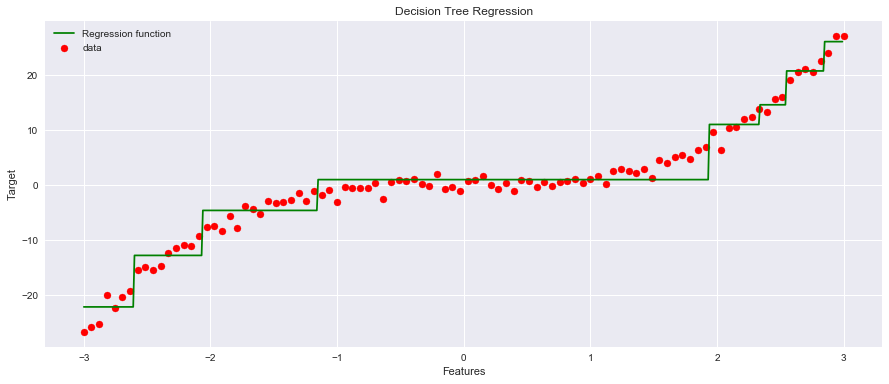

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
np.random.seed(124)
X = np.linspace(-3, 3, 100)
y = X ** 3 + np.random.randn(100)
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Print the data dimensions
print('Shape X_train:', X_train.shape)
print('Shape y_train:', y_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_test:', y_test.shape)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
# Make predictions and evaluate 
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))
# Visualize Regressor
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X, y, color = 'red', label='data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

These horizontal lines represent sections. Predictions are averages of data points in these sections. So prediction for all values from the same section will be the same. 
Without regularization, decision trees are likely to overfit the training examples. This can be prevented using techniques like pruning or by providing a maximum allowed tree depth and/or a minimum number of samples required to split a node further as we saw with classification.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2927982/
https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/
http://www.statsoft.com/Textbook/Classification-and-Regression-Trees
https://www.youtube.com/watch?v=DCZ3tsQIoGU

###### Hyperparameter and Tuning

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  
(506, 14)


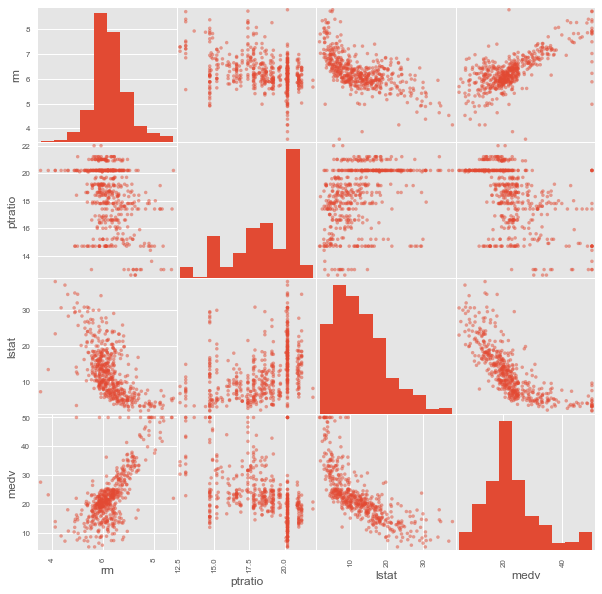

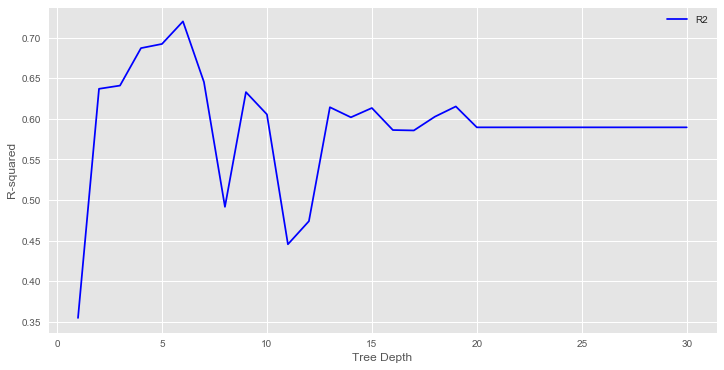

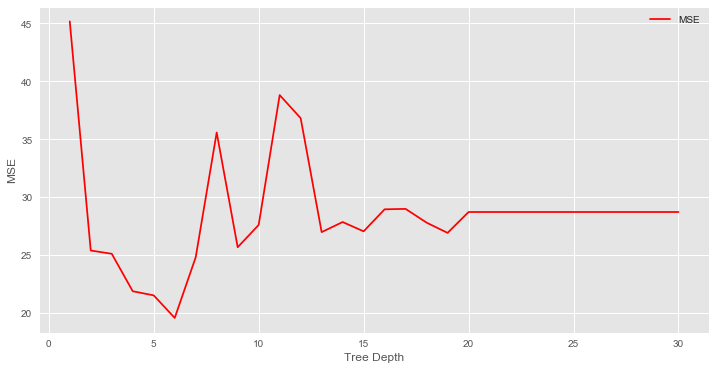

7.0


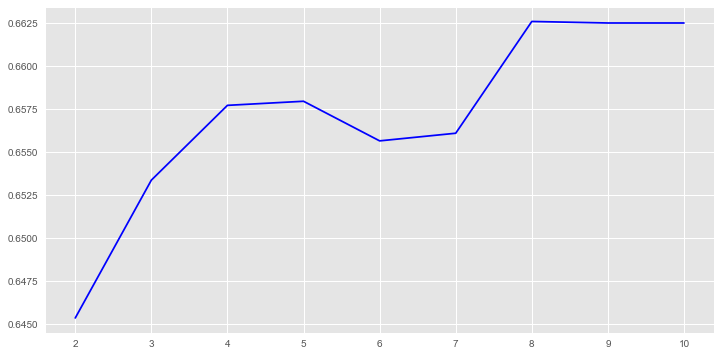

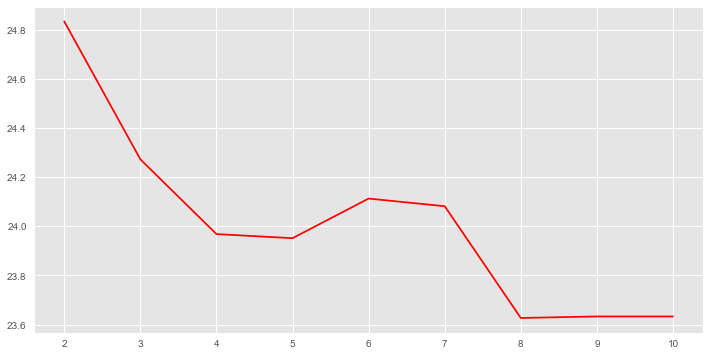

10


(0.6625129911753811, 23.633251248417313)

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
data = pd.read_csv('boston.csv', index_col=0)

# Print the first five rows 
print(data.head())

# Print the dimensions of data
print(data.shape)
# Features and target data
target = data['medv']
to_drop = ['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'black', 'medv']
features = data.drop(to_drop, axis=1)
evaluate = features.join(target)
evaluate.sample(10)
# Your code here 
pd.plotting.scatter_matrix(evaluate, figsize=(10,10));
# Import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r_squared = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mean_square_error = mse(y_true, y_predict)
    
    # Return the score
    return r_squared, mean_square_error


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]
from sklearn.model_selection import train_test_split 
X = features
y = target
# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE
# Hyperparameter tuning
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()
print(max_depths[6])
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.show()
print(min_samples_splits[8])
# Your code here 
regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
performance(y_test, y_pred)

## Classification

Classification allows us to tell if something belongs to one class, or the other. Questions that can be answered in a True/False format are a type of Binary Classification. However, we are not limited to only two classes when working with classification algorithms--we can have as many classes as we see fit. When a supervised learning problem has more than two classes, we refer to it as a Multiclass Classification problem.

### Types
- Decision Trees
- Naive Bayes
- Logistic regression

#### Decision Trees

##### Definition
Decision trees are used to classify (or estimate continuous values) by partitioning the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.
##### How
A decision tree is a different type of classifier that performs a recursive partition of the sample space.
##### Details
From Graph theory, a tree is a directed acyclic graph with a root called "root node" that has no incoming edges. All other nodes have one (and only one) incoming edge. Nodes having outgoing edges are known as internal nodes. All other nodes are called leaves. Nodes with an incoming edge, but no outgoing edges, are called terminal nodes.
##### Directed Acyclic Graphs
A directed graph is a collection of nodes and edges such that edges can be traversed only in a specified direction (eg, from node A to node B, but not from node B to node A). An acyclic graph is a graph such that it is impossible for a node to be visited twice along any path from one node to another. So, a directed acyclic graph (or, a DAG) is a directed graph with no cycles. A DAG has a topological ordering, or, a sequence of the nodes such that every edge is directed from earlier to later in the sequence. So, a decision tree is effectively a DAG, such as the one seen below where each internal node partitions the sample space into two (or more) sub-spaces. These nodes are partitioned according to some discrete function that takes the attributes of the sample space as input.

![Decision Tree](decision_tree.png)

This is the basic idea behind decision trees: every internal node checks for a condition and performs a decision, and every terminal node (AKA leaf node) represents a discrete class. Decision tree induction is closely related to rule induction. In essence, a decision tree is a just series of IF-ELSE statements (rules).

![Decision Tree In Action](decision_tree_in_action.png)

Regression trees are represented in the same manner, but instead they predict continuous values like the price of a house.

##### Training
1. Present a dataset of training examples containing features/predictors and a target (similar to classifiers we have seen earlier).
2. Train the tree model by making splits for the target using the values of predictors. Which features to use as predictors gets selected following the idea of feature selection and uses measures like "information gain" and "Gini Index".
3. The tree is grown until some stopping criteria is achieved. This could be a set depth of the tree or any other similar measure.
    - There are a couple of algorithms used to build a decision tree:
        - CART (Classification and Regression Trees) uses the Gini Index as a metric
        - ID3 (Iterative Dichotomiser 3) uses the entropy function and information gain as metrics
    - We need to determine the attribute that best classifies the training data, and use this attribute at the root of the tree. At each node, we repeat this process creating further splits, until a leaf node is achieved, i.e., all data gets classified. In order to identify the best attribute for ID3 classification trees, we use the "information gain" criteria. Information gain (IG) measures how much "information" a feature gives us about the class. Decision trees always try to maximize information gain. So, the attribute with the highest information gain will be split on first.
4. Show a new set of features to the tree, with an unknown class and let the example propagate through a trained tree. The resulting leaf node represents the class prediction for this example datum.

##### Entropy and Information Gain
Information gain is calculated using a statistical measure called Entropy. In electronics and computer science, the idea of entropy is usually derived from Shannon's description of entropy to measure the information gain against some cost incurred in the process.
- **Entropy is a measure of disorder or uncertainty**. 
- The measure is named after Claude Shannon, who is known as the "father of information theory". Information theory provides measures of uncertainty associated with random variables.
- The entropy of a variable is the "amount of information" contained in the variable. Similarly, the information in a variable is tied to the amount of surprise the value of that variable causes when revealed. 
In a nutshell, higher entropy means less predictive power when it comes to doing data science with that data.

Because decision trees use a supervised learning approach, **we know the target variable of our data**. So, we maximize the purity of the classes as much as possible while making splits, aiming to have clarity in the leaf nodes. At each step, we want to **decrease the entropy**, so entropy is computed before and after the split. If it decreases, the split is retained and we can proceed to the next step, otherwise, we must try to split with another feature or stop this branch (or quit, in which case we claim that the current tree is the best solution).

Let's pretend we have a sample,  𝑆 . This sample contains  𝑁  total items falling into two different categories, True and False. Of the  𝑁  total items we have,  𝑛  observations have a target value equal to  𝑇𝑟𝑢𝑒 , and  𝑚  observations have a target value equal to  𝐹𝑎𝑙𝑠𝑒 . Note that if we know  𝑁  and  𝑛 , we can easily calculate  𝑚  to be  𝑚=𝑁−𝑛 . Let's assume our boss brings us the dataset  𝑆 , and asks us to group each observation in  𝑁  according to whether their target value is True or False. They also want to know the ratio of Trues to Falses in our dataset. We can calculate this as follows:
𝑝 = 𝑛 / 𝑁−(𝑐𝑙𝑎𝑠𝑠1) 
𝑞 = 𝑚 / 𝑁 = 1 − 𝑝 − (𝑐𝑙𝑎𝑠𝑠2)
If we know these ratios, we can calculate the entropy of the dataset  𝑆 . We can calculate entropy using the following equation for two groups:
𝐸 = −𝑝.𝑙𝑜𝑔 base 2 (𝑝) − 𝑞.𝑙𝑜𝑔 base 2(𝑞) --> for 2 groups only
Entropy  𝐻(𝑆)  is a measure of the amount of uncertainty in the dataset  𝑆 . We can see this is a measurement or characterization of the amount of information contained within the dataset  𝑆 .
𝐻(𝑆)=−∑(𝑃𝑖.𝑙𝑜𝑔 base 2(𝑃𝑖)) --> for multiple groups
If we know how much entropy exists in a subset (and remember, we can subset our data by just splitting it into 2 or more groups according to whatever metric we choose), then we can easily calculate how much information gain each potential split would give us!
**Information gain is an impurity/uncertainty** based criterion that uses the entropy as the measure of impurity.
The equation for information gain is:
𝐼𝐺(𝐴,𝑆) = 𝐻(𝑆) − ∑𝑝(𝑡) * 𝐻(𝑡)
    Where:
- 𝐻(𝑆)  is the entropy of set  𝑆 
- 𝑡  is a subset of the attributes contained in  𝐴  (we represent all subsets  𝑡  as  𝑇 )
- 𝑝(𝑡)  is the proportion of the number of elements in  𝑡  to the number of elements in  𝑆 
- 𝐻(𝑡)  is the entropy of a given subset  𝑡

In [ ]:
def entropy(pi): # where pi is a list of class distributions
    """
    return the Entropy of a probability distribution:
    entropy(p) = - SUM (Pi * log(Pi) )
    """
    from math import log
    total = 0
    for p in pi:
        p = p / sum(pi)
        if p != 0:
            total +=  p * log(p, 2)
        else:
            total += 0
    total *= -1
    return total

In [ ]:
def IG(D, a): #  take in D as a class distribution array for target class, and a the class distribution of the attribute to be tested
    """
    return the information gain:
    gain(D, A) = entropy(D)− SUM( |Di| / |D| * entropy(Di) )
    """

    total = 0
    for Di in a:
        total += abs(sum(Di) / sum(D)) * entropy(Di)

    gain = entropy(D) - total
    return gain

###### ID3 (Iterative Dichotomiser 3 algorithm) Classification Trees
Information gain is the key criterion that is used by the ID3 classification tree algorithm to construct a decision tree. The decision tree algorithm will always try to maximize information gain. The entropy of the dataset is calculated using each attribute, and the attribute showing highest information gain is used to create the split at each node. A simple understanding of information gain can be written as:

𝐼𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛 𝐺𝑎𝑖𝑛 = 𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝑝𝑎𝑟𝑒𝑛𝑡 − 𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝑐ℎ𝑖𝑙𝑑 * [𝑐ℎ𝑖𝑙𝑑 𝑤𝑒𝑖𝑔ℎ𝑡𝑒𝑑 𝑎𝑣𝑒𝑟𝑎𝑔𝑒]

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration.

###### Building Trees using Scikit-learn

In order to prepare data, train, evaluate, and visualize a decision tree, we will make use of several modules in the scikit-learn package.

In [8]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import accuracy_score, roc_curve, auc
# Load the dataset
df = pd.read_csv('tennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [2]:
# Before we do anything we'll want to split our data into training and test sets.
X = df.loc[:, ['outlook', 'temp', 'humidity', 'windy']]
y = df.loc[:, 'play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [3]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

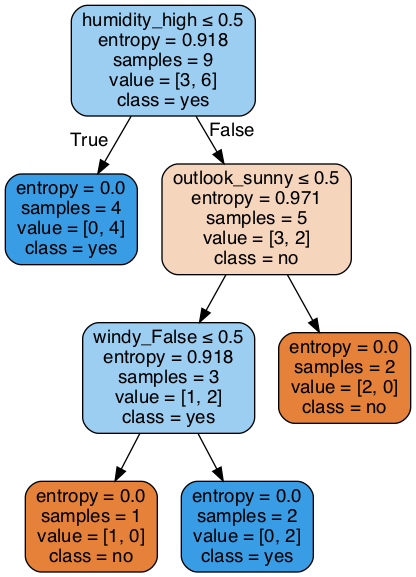

In [5]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=ohe_df.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [10]:
# Now that we have a trained model, we can generate some predictions, 
# and go on to see how accurate our predictions are. 
# We can use a simple accuracy measure, AUC, a confusion matrix, or all of them. 
# This step is performed in the exactly the same manner, 
# so it doesn't matter which classifier you are dealing with.
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6


In [11]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
# Create DataFrame
columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_csv('data_banknote_authentication.csv', header=None)
df.columns = columns
df.sample(10)
# Describe the dataset
df.describe()
# Shape of dataset
df.shape
# Class frequency of target variable 
print(df['Class'].unique())
print('Class = 0: ' + str(len(df[df['Class']==0])))
print('Class = 1: ' + str(len(df[df['Class']==1])))
# Create features and labels
y = df['Class']
X = df.drop('Class', axis=1)
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
# Train a DT classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Make predictions for test data
y_preds = clf.predict(X_test)
# Calculate accuracy 
acc = accuracy_score(y_test, y_preds)*100
print('Accuracy is: {0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds, rownames=['True'], colnames=['Predicted'], margins=True)

[0 1]
Class = 0: 762
Class = 1: 610
Accuracy is: 98.54545454545455

AUC is :0.99

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,150,2,152
1,2,121,123
All,152,123,275


###### Hyperparameter Tuning and Pruning

Hyperparameter tuning relates to how we sample candidate model architectures from the space of all possible hyperparameter values. This is often referred to as **searching the hyperparameter space for the optimum values**. In this lesson, we'll look at some of the key hyperparameters for decision trees and how they affect the learning and prediction processes.
**In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins.**
Different model training algorithms require different hyperparameters, some simple algorithms (such as ordinary least squares regression) require none. For instance, Lasso is an algorithm that adds a regularization hyperparameter to ordinary least squares regression, which has to be set before estimating the parameters through the training algorithm.
A decision tree, grown beyond a certain level of complexity leads to overfitting. If we grow our tree and carry on using poor predictors that don't have any impact on the accuracy, we will eventually a) slow down the learning, and b) cause overfitting. 

####### Tree Pruning

Now that we know how to grow a decision tree using Python and scikit-learn, let's move on and practice optimizing a classifier. We can tweak a few parameters in the decision tree algorithm before the actual learning takes place. Different tree pruning parameters can adjust the amount of overfitting or underfitting in order to optimize for increased accuracy, precision, and/or recall.
We can prune our trees using:
- Maximum depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data
    - The parameter for decision trees that we normally tune first is max_depth. This parameter indicates how deep we want our tree to be. 
    - If the tree is too deep, it means we are creating a large number of splits in the parameter space and capturing more information about underlying data. This may result in overfitting. Generally speaking, a low training error but a large testing error is a strong indication of this.
    - If, on the other hand, the tree is too shallow, we may run into underfitting, i.e., we are not learning enough information about the data and the accuracy of the model stays low for both the test and training samples.
    - we see that as the tree depth increases, our validation/test accuracy starts to go down
    -  max_depth is related to the computational cost involved with growing the tree. Large values for these parameters can create complex, dense, and long trees. For large datasets, it may become extremely time-consuming to use default values.
- Minimum samples leaf with split: Restrict the size of sample leaf
    - The hyperparameter min_samples_split is used to set the minimum number of samples required to split an internal node. When we increase this parameter value, the tree becomes more constrained as it has to consider more samples at each node.
    - The training and test accuracy stabilize at a certain minimum sample split size, and stays the same even if we carry on increasing the size of the split.
    -  min_samples_split is related to the computational cost involved with growing the tree. Large values for these parameters can create complex, dense, and long trees. For large datasets, it may become extremely time-consuming to use default values.
- Minimum leaf sample size: Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total
    - This hyperparameter is used to identify the minimum number of samples that we want a leaf node to contain. When this minimum size is achieved at a node, it does not get split any further. This parameter is similar to min_samples_splits, however, this describes the minimum number of samples at the leaves, the base of the tree.
    - The above plot shows the impact of this parameter on the accuracy of the classifier. We see that increasing this parameter value after an optimal point reduces accuracy. That is due to underfitting again, as keeping too many samples in our leaf nodes means that there is still a high level of uncertainty in the data.
- Maximum leaf nodes: Reduce the number of leaf nodes
- Maximum features: Maximum number of features to consider when splitting a node
Other hyperparameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
Hyperparameter resources: 
- https://cloud.google.com/ml-engine/docs/tensorflow/hyperparameter-tuning-overview
- https://towardsdatascience.com/demystifying-hyper-parameter-tuning-acb83af0258f
- https://www.displayr.com/machine-learning-pruning-decision-trees/

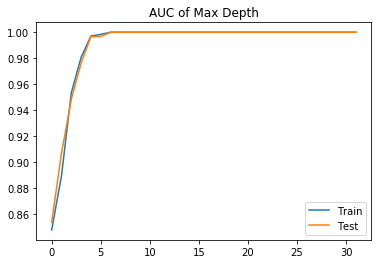

In [15]:
import matplotlib.pyplot as plt
SEED = 1
max_depths = list(range(1, 33)) # create a list of tests for whatever variable you want to test, interpret the graph to find the best option
roc_auc_train = []
roc_auc_test = []
for i in max_depths:
    dt_test = DecisionTreeClassifier(criterion='entropy', max_depth=(i), random_state=SEED)
    dt_test.fit(X_train, y_train)
    y_preds_train = dt_test.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_preds_train)
    roc_auc_train.append(auc(false_positive_rate, true_positive_rate))
    y_preds_test = dt_test.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_test)
    roc_auc_test.append(auc(false_positive_rate, true_positive_rate))
plt.plot(roc_auc_train, label='Train')
plt.plot(roc_auc_test, label='Test')
plt.legend()
plt.title('AUC of Max Depth');

## Ensembles

### Ensemble Methods

In Data Science, the term ensemble refers to an algorithm that makes use of more than one model to make a prediction. Typically, when people talk about ensembles, they are referring to Supervised Learning, although there has been some ongoing research on using ensembles for unsupervised learning tasks. 
https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/
Think back to what you've learned about sampling, inferential statistics, and the Central Limit theorem.
- This is where "Wisdom of the crowd" kicks in because we can expect the number of people who underestimate the number of jellybeans in the jar to be roughly equal to the number of people who overestimate the number of jellybeans. So we can safely assume the extra variance above and below the average essentially cancel each other out, leaving our average close to the ground truth value!
- The idea that the overestimates and underestimates will (at least partially) cancel each other out is sometimes referred to as smoothing.
Random forests and Gradient boosted trees. It's not uncommon to see Model stacking, also called Meta-ensembling, where multiple different models are stacked, and their predictions are aggregated. In this case, the more different the models are, the better! This is because the more different the models are, the more likely they have the potential to pick up on different characteristics of the data. It's not uncommon to see ensembles consisting of multiple logistic regressions, Naive Bayes classifiers, Tree-based models (including ensembles such as random forests), and even deep neural networks!
- http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/

### Bootstrap Aggregation (Bagging)

The main concept that makes ensembling possible is Bagging, which is short for Bootstrap Aggregation. Bootstrap aggregation is itself a combination of two ideas -- bootstrap resampling and aggregation. 
- bootstrap resampling from our section on the Central Limit theorem. It refers to the subsets of your dataset by sampling with replacement, much as we did to calculate our sample means when working with the Central Limit theorem.
- Aggregation is exactly as it sounds -- the practice of combining all the different estimates to arrive at a single estimate -- although the specifics for how we combine them are up to us. A common approach is to treat each classifier in the ensemble's prediction as a "vote" and let our overall prediction be the majority vote. It's also common to see ensembles that take the arithmetic mean of all predictions, or compute a weighted average.
- Training
    - Grab a sizable sample from your dataset, with replacement
    - Train a classifier on this sample
    - Repeat until all classifiers have been trained on their own sample from the dataset
    - When making a prediction, have each classifier in the ensemble make a prediction
    - Aggregate all predictions from all classifiers into a single prediction, using the method of your choice

![Bagging](new_bagging.png)

Decision trees are often used because they are very sensitive to variance. On their own, this is a weakness. However, when aggregated together into an ensemble, this actually becomes a good thing!

### Random Forests

![Random Forest](new_rf-diagram.png)

The Random Forest algorithm is a supervised learning algorithm that can be used both for classification and regression tasks. Decision trees are the cornerstone of random forests. decision trees use a greedy algorithm, meaning that given the same data, the algorithm will make a choice that maximizes information gain at every step. So how do we create high variance among all the trees in our random forest? The answer lies in two clever techniques that the algorithm uses to make sure that each tree focuses on different things -- Bagging and the Subspace Sampling Method.

#### Bagging
The first way to encourage differences among the trees in our forest is to train them on different samples of data. 
- For each tree, we sample two-thirds of our training data with replacement -- this is the data that will be used to build our tree. 
- The remaining data is used as an internal test set to test each tree -- this remaining one-third is referred to as Out-Of-Bag Data, or OOB. 
- For each new tree created, the algorithm then uses the remaining one-third of data that wasn't sampled to calculate the Out-Of-Bag Error, in order to get a running, unbiased estimate of overall tree performance for each tree in the forest.
if a predictor that usually provides strong signal provides bad information for a given observation, then it's likely that all the trees will fall for this false signal and make the wrong prediction.

#### Subspace sampling method
all this method does is randomly select a subset of features to use as predictors for each node when training a decision tree, instead of using all predictors available at each node.

This amount of diversity among the trees in our forest will make for a model that is extremely resilient to noisy data, thus reducing the chance of overfitting.

#### Benefits
Strong performance: The random forest algorithm usually has very strong performance on most problems, when compared with other classification algorithms. Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well.

Interpretability: Conveniently, since each tree in the random forest is a Glass-Box Model (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall random forest is, as well! You'll demonstrate this yourself in the upcoming lab, by inspecting feature importances for both individual trees and the entire random forest

#### Drawbacks
Computational complexity: Like any ensemble method, training multiple models means paying the computational cost of training each model. On large datasets, the runtime can be quite slow compared to other algorithms.

Memory usage: Another side effect of the ensembled nature of this algorithm, having multiple models means storing each in memory. Random forests tend to have a larger memory footprint than other models. Whereas a parametric model like a logistic regression just needs to store each of the coefficients, a random forest has to remember every aspect of every tree! It's not uncommon to see random forests that were trained on large datasets have memory footprints in the tens or even hundreds of MB. For data scientists working on modern computers, this isn't typically a problem -- however, there are special cases where the memory footprint can make this an untenable choice -- for instance, an app on a smartphone that uses machine learning may not be able to afford to spend that much disk space on a random forest model!

References:
https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

#### How to Bag and Forest in SciKit Learn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 6 columns):
Age             32561 non-null int64
Education       32561 non-null object
Occupation      32561 non-null object
Relationship    32561 non-null object
Race            32561 non-null object
Sex             32561 non-null object
dtypes: int64(1), object(5)
memory usage: 1.7+ MB
None
[[5693  472]
 [ 988  988]]
              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.89      6165
        >50K       0.68      0.50      0.58      1976

    accuracy                           0.82      8141
   macro avg       0.76      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141

Testing Accuracy for Decision Tree Classifier: 82.07%


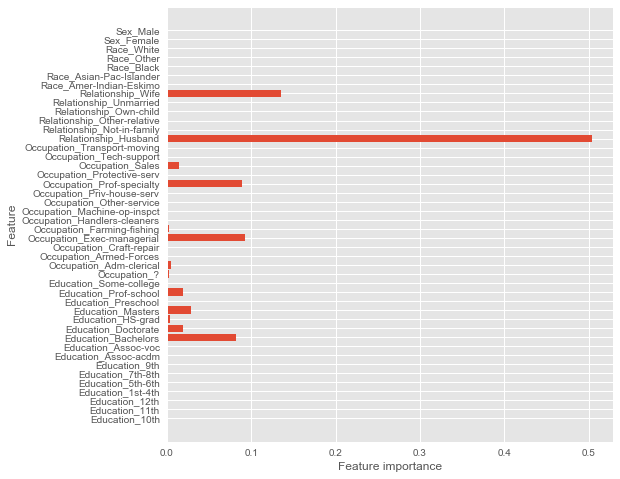

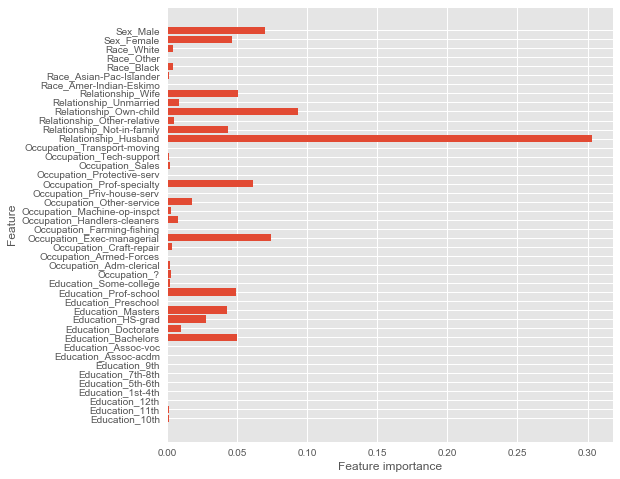

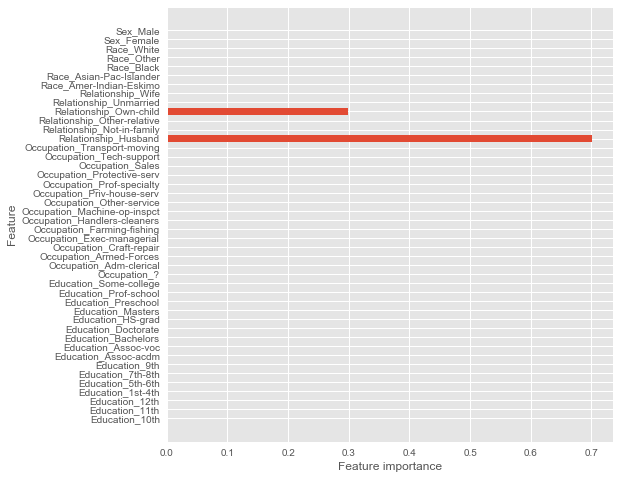

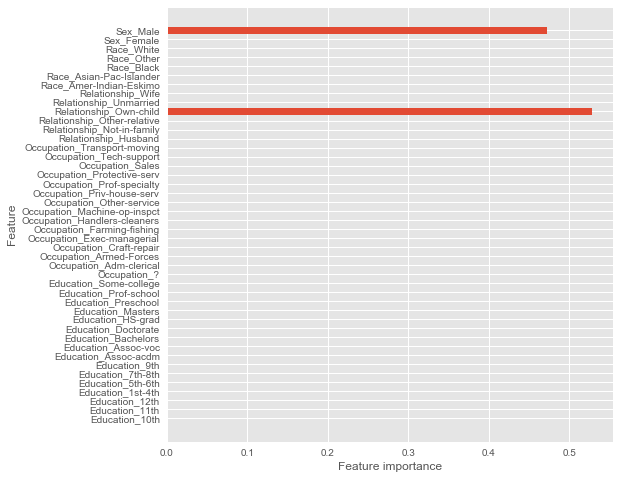

In [20]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# Import the data
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()
# Split the outcome and predictor variables
target = salaries['Target']
features = salaries.drop('Target', axis=1)
features.head()
# Your code here
print(features.info())
# Create dummy variables
data = pd.get_dummies(features.drop('Age', axis=1))
data.head()
# test-train split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.25, random_state = 123)
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)
# Feature importance
tree_clf.feature_importances_
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(tree_clf)
# Test set predictions
pred = tree_clf.predict(data_test)
# Confusion matrix and classification report
conf = confusion_matrix(target_test, pred)
print(conf)
class_report = classification_report(target_test, pred)
print(class_report)
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))
# Instantiate a BaggingClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
bagged_tree = BaggingClassifier(tree, n_estimators=20)
# Fit to the training data
bagged_tree.fit(data_train, target_train)
# Training accuracy score
bagged_tree.score(data_train, target_train)
# Test accuracy score
bagged_tree.fit(data_test, target_test)
bagged_tree.score(data_test, target_test)
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(data_train, target_train)
# Training accuracy score
forest.score(data_train, target_train)
# Test accuracy score
forest.fit(data_test, target_test)
forest.score(data_test, target_test)
plot_feature_importances(forest)
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)
# First tree from forest_2
forest_2.fit(data_train, target_train)
rf_tree_1 = forest_2.estimators_[0]
# Feature importance
plot_feature_importances(rf_tree_1)
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]
# Feature importance
plot_feature_importances(rf_tree_2)

### GridsearchCV --> Parameter Tuning

use a combinatorial grid search to find the best combination of parameters for a given model.
the parameters are not independent of one another -- the value set for one parameter can have significant effects on other parameters,
So how do we know which combination of parameters is best? The only way we can really know for sure is to try every single combination! For this reason, grid search is sometimes referred to as an exhaustive search.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
how to use GridSearchCV to perform a parameter grid search using a sample parameter grid, param_grid. 
- Our parameter grid should be a dictionary, 
    - where the keys are the parameter names, 
    - and the values are the different parameter values we want to use in our grid search for each given key.
- After creating the dictionary, all you need to do is pass it to GridSearchCV() along with the classifier. 
- You can also use K-fold cross-validation during this process, by specifying the cv parameter. 

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(train_data, train_labels)

gs_tree.best_params_

NameError: name 'train_data' is not defined

Once it has tried every combination, the GridSearchCV object we created will automatically default the model that had the best score. We can even access the best combination of parameters by checking the best_params_ attribute!

##### Drawbacks
However, it is only as good as the parameters we put in our parameter grid -- so we need to be very thoughtful during this step!

The main drawback of an exhaustive search such as GridsearchCV is that there is no way of telling what's best until we've exhausted all possibilities! This means training many versions of the same machine learning model, which can be very time consuming and computationally expensive.

### Gradient Boosting and Weak Learners

The term Weak Learner refers to simple models that do only slightly better than random chance. Boosting algorithms start with a single weak learner (tree methods are overwhelmingly used here), but technically, any model will do. Boosting works as follows:
- Train a single weak learner
- Figure out which examples the weak learner got wrong
- Build another weak learner that focuses on the areas the first weak learner got wrong
- Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued
In this way, each new weak learner is specifically tuned to focus on the weak points of the previous weak learner(s). The more often an example is missed, the more likely it is that the next weak learner will be the one that can classify that example correctly. In this way, all the weak learners work together to make up a single strong learner.

#### Compared to Forests

##### Similarities

Boosting algorithms share some similarities with random forests, as well as some notable differences. Like random forests, boosting algorithms are an ensemble of many different models with high inter-group diversity. Boosting algorithms also aggregate the predictions of each constituent model into an overall prediction. Both algorithms also make use of tree models (although this isn't strictly required, in the case of boosting).

##### Differences

- Independent vs. iterative
Whereas a random forest trains each tree independently and at the same time, boosting trains each tree iteratively. Boosting, on the other hand, trains trees one at a time, identifies the weak points for those trees, and then purposefully creates the next round of trees in such a way as to specialize in those weak points.
- Weak vs. strong
In a random forest, each tree is a strong learner -- they would do just fine as a decision tree on their own. In boosting algorithms, trees are artificially limited to a very shallow depth (usually only 1 split), to ensure that each model is only slightly better than random chance. For this reason, boosting algorithms are also highly resilient against noisy data and overfitting. Since the individual weak learners are too simple to overfit, it is very hard to combine them in such a way as to overfit the training data as a whole -- especially when they focus on different things, due to the iterative nature of the algorithm.
- Aggregate predictions
Whereas in a random forest, each tree simply votes for the final result, boosting algorithms usually employ a system of weights to determine how important the input for each tree is. Since we know how well each weak learner performs on the dataset by calculating its performance at each step, we can see which weak learners do better on hard tasks.
Since our "specialized" tree has more weight, its correct vote will carry more weight than the combined votes of the half of the "unspecialized" trees that get it wrong.

#### Adaboost (Adaptive Boosting)

In Adaboost, each learner is trained on a subsample of the dataset, much like we saw with Bagging. Initially, the bag is randomly sampled with replacement. However, each data point in the dataset has a weight assigned. As learners correctly classify an example, that example's weight is reduced. Conversely, when learners get an example wrong, the weight for that sample increases.
**Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner.**

#### Gradient Boosted Trees

Gradient Boosted Trees are a more advanced boosting algorithm that makes use of **Gradient Descent**. Much like Adaboost, gradient boosting starts with a weak learner that makes predictions on the dataset. The algorithm then checks this learner's performance, identifying examples that it got right and wrong. However, this is where the gradient boosting algorithm diverges from Adaboost's methodology. The model then calculates the **Residuals** for each data point, to determine how far off the mark each prediction was. The model then combines these residuals with a **Loss Function** to calculate the overall loss. There are many loss functions that are used -- the thing that matters most is that the loss function is differentiable so that we can use calculus to compute the gradient for the loss, given the inputs of the model. We then use the gradients and the loss as predictors to train the next tree against! In this way, we can use **Gradient Descent** to minimize the overall loss.
Learning Rate
Step size for gradient descent function
You'll often see learning rates denoted by the symbol,  𝛾  -- this is the greek letter, gamma.

### XGBoost

The version with the highest performance right now is XGBoost, which is short for eXtreme Gradient Boosting.
For instance, XGBoost is configured in such a way that it 
- parallelizes the construction of trees across all your computer's CPU cores during the training phase. It also allows for more advanced use cases, such as 
- distributing training across a cluster of computers, which is often a technique used to speed up computation. The algorithm even automatically 
- handles missing values!

### K-Nearest Neighbors

intuitive algorithm known as K-Nearest Neighbors (KNN). KNN is an effective classification and regression algorithm that uses nearby points in order to generate a prediction.
The K-Nearest Neighbors algorithm works as follows:
1. Choose a point
2. Find the K-nearest points
    - K is a predefined user constant such as 1, 3, 5, or 11
3. Predict a label for the current point:
    - Classification - Take the most common class of the k neighbors
    - Regression - Take the average target metric of the k neighbors
Both classification or regression can also be modified to use weighted averages based on the distance of the neighbors
KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are. In KNN, each column acts as a dimension. In a dataset with two columns, we can easily visualize this by treating values for one column as X coordinates and and the other as Y coordinates. Since this is a Supervised learning algorithm, you must also have the labels for each point in the dataset.
KNN is unique compared to other classifiers in that it does almost nothing during the "fit" step, and all the work during the "predict" step. During the "fit" step, KNN just stores all the training data and corresponding labels. No distances are calculated at this point.
All the magic happens during the "predict" step. During this step, KNN takes a point that you want a class prediction for, and calculates the distances between that point and every single point in the training set. It then finds the K closest points, or Neighbors, and examines the labels of each.
When using KNN, you can use Manhattan, Euclidean, Minkowski distance, or any other distance metric. Choosing an appropriate distance metric is essential and will depend on the context of the problem at hand.
How to evaluate the model performance depends on whether you're using the model for a classification or regression task. KNN can be used for regression (by averaging the target scores from each of the K-nearest neighbors), as well as for both binary and multicategorical classification tasks.
Evaluating classification performance for KNN works the same as evaluating performance for any other classification algorithm -- you need a set of predictions, and the corresponding ground-truth labels for each of the points you made a prediction on. You can then compute evaluation metrics such as Precision, Recall, Accuracy, F1-Score etc.

**requires scaling of data** larger scale numbers can impact selection

In [ ]:
class KNN:
    
    def fit():
        pass
    
    def predict():
        pass

def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
    
# This line updates the knn.fit method to point to the function you've just written
KNN.fit = fit

def _get_distances(self, x):
    distances = []
    for ind, val in enumerate(self.X_train):
        dist_to_i = euclidean(x, val)
        distances.append((ind, dist_to_i))
    return distances

# This line attaches the function you just created as a method to KNN class 
KNN._get_distances = _get_distances

def _get_k_nearest(self, dists, k):
    sorted_dists = sorted(dists, key=lambda x: x[1])
    return sorted_dists[:k]

# This line attaches the function you just created as a method to KNN class 
KNN._get_k_nearest = _get_k_nearest

def _get_label_prediction(self, k_nearest):
        
    labels = [self.y_train[i] for i, _ in k_nearest]
    counts = np.bincount(labels)
    return np.argmax(counts)

# This line attaches the function you just created as a method to KNN class
KNN._get_label_prediction = _get_label_prediction

def predict(self, X_test, k=3):
    preds = []
    # Iterate through each item in X_test
    for i in X_test:
        # Get distances between i and each item in X_train
        dists = self._get_distances(i)
        k_nearest = self._get_k_nearest(dists, k)
        predicted_label = self._get_label_prediction(k_nearest)
        preds.append(predicted_label)
    return preds

# This line updates the knn.predict method to point to the function you've just written
KNN.predict = predict

#### Finding the optimal number of neighbors

While the best value for K is not immediately obvious for any problem, there are some strategies that you can use to select a good or near optimal value, this assists with over and underfitting a model.
- When K is small, any given prediction only takes into account a very small number of points around it to make the prediction. If K is too small --> overfitting
- Conversely, as K grows larger, it takes into account more and more points, that are farther and farther away from the point in question, increasing the overall size of the region taken into account. If K grows too large --> underfitting

![k distance matters](best_k_fs.png)

##### Iterating over values of K
Since the model arrives at a prediction by voting, it makes sense that you should only use odd values for k, to avoid ties and subsequent arbitrary guesswork. By adding this constraint (an odd value for k) the model will never be able to evenly split between two classes. From here, finding an optimal value of K requires some iterative investigation.
The best way to find an optimal value for K is to choose a minimum and maximum boundary and try them all! In practice, this means:
1. Fit a KNN classifier for each value of K
2. Generate predictions with that model
3. Calculate and evaluate a performance metric using the predictions the model made
Compare the results for every model and find the one with the lowest overall error, or highest overall score!

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(labels, preds))
    print("Recall Score: {}".format(labels, preds))
    print("Accuracy Score: {}".format(labels, preds))
    print("F1 Score: {}".format(labels, preds))
# print_metrics(y_test, test_preds)
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

#### Distance metrics

An incredibly important decision when using the KNN algorithm is determining an appropriate distance metric. This makes a monumental impact to the output of the algorithm. While there are additional distance metrics, such as cosine distance which we will not cover, you'll get a solid introduction to distance metrics by looking at the standard Euclidean distance and its more generic counterpart, Minkowski distance.

The assumption that distance-based classifiers like KNN are built on is that distance helps us quantify similarity.

##### Manhattan distance

The first (and easiest) distance metric you'll cover is Manhattan distance. Manhattan distance is aptly named, because it measures the distance from one point to another traveling along the axes of a grid.

![manhattan](manhattan_fs.png)

Here's the formula for Manhattan distance:

𝑑(𝑥,𝑦)=∑𝑖=1𝑛|𝑥𝑖−𝑦𝑖|
 
Let's break this formula down:

The left side of the equals sign just means "the distance between point x and point y".
The right side means calculate the absolute number of units you move in each distinct dimension, and then sum them all up.

The  ∑  just means "the cumulative sum of each step". In a given step, you take a dimension, and then look at the corresponding values for that dimension on point X and point Y. You then compute the absolute value of the difference between them by subtracting Y's value for that dimension from X's value for that dimension, and then add it to our total.

In [ ]:
# Locations of two points A and B
A = (2, 3, 5)
B = (1, -1, 3)

manhattan_distance = 0

# Use a for loop to iterate over each element
for i in range(3):
    # Calculate the absolute difference and add it
    manhattan_distance += abs(A[i] - B[i])

manhattan_distance

#### Euclidean distance

The equation at the heart of this one is probably familiar to you:  𝑎2+𝑏2=𝑐2 , or the Pythagorean theorem!

For instance, if you wanted to calculate the Euclidean distance between two points in a 3-dimensional space, then the formula would be  𝑑2=𝑎2+𝑏2+𝑐2 , with  𝑑  being the Euclidean distance.

![euclidean_distance](euclidian_distance.png)

This is a straightforward equation -- for each dimension, you subtract one point's value from the other's to get the length of that "side" of the triangle in that dimension, square it, and add it to our running total. The square root of that running total is our Euclidean distance.

In [ ]:
from math import sqrt 

# Locations of two points A and B
A = (2, 3, 5)
B = (1, -1, 3)

euclidean_distance = 0

# Use a for loop to iterate over each element
for i in range(3):
    # Calculate the difference, square, and add it
    euclidean_distance += (A[i] - B[i])**2

# Square root of the final result 
euclidean_distance = sqrt(euclidean_distance)

euclidean_distance

#### Minkowski distance

A final distance metric you should be familiar with is Minkowski distance. THe Minkowski distance is a generalized distance metric across a Normed Vector Space. A Normed Vector Space is just a fancy way of saying a collection of space where each point has been run through a function. It can be any function, as long it meets two criteria:
- the zero vector (just a vector filled with zeros) will output a length of 0, and
- every other vector must have a positive length

![minkowski](miniwinksi_distance.png)

In [ ]:
# Manhattan Distance is the sum of all side lengths to the first power
manhattan_distance = np.power((length_side_1 + length_side_2 + ... length_side_n)**1 , 1/1) 

# Euclidean Distance is the square root of the sum of all side lengths to the second power
euclidean_distance = np.power((length_side_1 + length_side_2 + ... length_side_n)**2, 1/2)

# Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power
minkowski_distance_3 = np.power((length_side_1 + length_side_2 + ... length_side_n)**3, 1/3)

# Minkowski Distance with a value of 5
minkowski_distance_5 = np.power((length_side_1 + length_side_2 + ... length_side_n)**5, 1/5)

You'll often see Minkowski distance used as a parameter for any distance-based machine learning algorithms inside sklearn

In [ ]:
# calculating distances
import numpy as np
def distance(a, b, c=2, verbose=True):
    if len(a) != len(b):
        raise ValueError("Both vectors must be of equal length!")
    
    if verbose:
        if c == 1:
            print("Calculating Manhattan distance:")
        elif c == 2:
            print("Calculating Euclidean distance:")
        else:
            print(f"Calcuating Minkowski distance (c={c}):")
            
    return np.power(np.sum(np.power(np.abs(np.array(a) - np.array(b)), c)), 1/c)

### K-means

While outside the scope of this section, it is worth mentioning the related K-means algorithm which uses similar principles as KNN but serves as an unsupervised learning clustering algorithm. In the K-means algorithm, K represents the number of clusters rather then the number of neighbors. Unlike KNN, K-means is an iterative algorithm which repeats until convergence. Nonetheless, its underlying principle is the same, in that it groups data points together using a distance metric in order to create homogeneous groupings.

### Support Vector Machines (SVM) 

SVM is a type of classifier which modifies the loss function for optimization to not only take into account overall accuracy metrics of the resulting predictions, but also to maximize the decision boundary between the data points. In essence, this further helps tune the classifier as a good balance between underfitting and overfitting.
In addition to optimizing for accuracy, support vector machines add a slack component, trading in accuracy to increase the distance between data points and the decision boundary.
Support vector machines that divide data points into their respective groups by drawing hyperplanes using the dimensions from the feature space. In practice, these have limitations and the dataset may not be cleanly separable. 
Rather than solely focus on the final accuracy of the model, Support Vector Machines aim to maximize the margin between the decision boundary and the various data points.
The margin is defined as the distance between the separating line (hyperplane) and the training set cases that are closest to this hyperplane. These cases define "support vectors". The support vectors in this particular case are highlighted in the image below. As you can see, the max-margin hyperplane is the midpoint between the two lines defined by the support vectors.

![support vector machine margins](new_SVM_fin.png)

First, define some numeric labels for the two classes. Set the circles to be -1 and the diamonds to be 1. Normally, 0 and 1 are used for class labels but in this particular case using -1 and 1 simplifies the mathematics.
Now some terminology: The lines defined by the support vectors are the negative (to the left) and the positive (to the right) hyperplanes, respectively. These hyperplanes are defined by two terms:  𝑤𝑇  and  𝑏 .
- The  𝑤𝑇  term is called the weight vector and contains the weights that are used in the classification.
- The  𝑏  term is called the bias and functions as an offset term. If there were no bias term, the hyperplane would always go through the origin which would not be very generalizable!
The equation describing the positive hyperplane is:
- 𝑏+𝑤𝑇𝑥𝑝𝑜𝑠=1
 and the equation describing the negative hyperplane is:
- 𝑏+𝑤𝑇𝑥𝑛𝑒𝑔=−1
Remember, your goal is to maximize the separation between the two hyperplanes. To do this, first subtract the negative hyperplane's equation from the positive hyperplane's equation:
- 𝑤𝑇(𝑥𝑝𝑜𝑠−𝑥𝑛𝑒𝑔)=2
Next, normalize  𝑤𝑇  by dividing both sides of the equation by its norm,  ||𝑤|| :

$$ || w ||= \sqrt{\sum^m_{j-1}w_j^2} $$

Dividing the former expression by  ||𝑤||  yields the equation below. The left side of the resulting equation can be interpreted as the distance between the positive and negative hyperplanes. This is the margin you're trying to maximize.

$$ \dfrac{w_T(x_{pos}-x_{neg})}{\lVert w \rVert} = \dfrac{2}{\lVert w \rVert}$$

The objective of the SVM is then maximizing $\dfrac{2}{\lVert w \rVert}$ under the constraint that the samples are classified correctly. Mathematically,
- $ b + w_Tx^{(i)} \geq 1$  if $y ^{(i)} = 1$
- $ b + w_Tx^{(i)} \leq -1$  if $y ^{(i)} = -1$
- For $i= 1,\ldots ,N$

These equations basically say that all negative samples should fall on the left side of the negative hyperplane, whereas all the positive samples should fall on the right of the positive hyperplane. This can also be written in one line as follows:
$y ^{(i)} (b + w_Tx^{(i)} )\geq 1$  for each $i$

Note that maximizing $\dfrac{2}{\lVert w \rVert}$ means we're minimizing $\lVert w \rVert$, or, as is done in practice because it seems to be easier to be minimized, $\dfrac{1}{2}\lVert w \rVert^2$.

#### The Soft Margin classifier

Introducing slack variables $\xi$. The idea for introducing slack variables is that the linear constraints need to be relaxed for data that are not linearly separable, as not relaxing the constraints might lead to the algorithm that doesn't converge. 

$ b + w_Tx^{(i)} \geq 1-\xi^{(i)}$  if $y ^{(i)} = 1$

$ b + w_Tx^{(i)} \leq -1+\xi^{(i)}$  if $y ^{(i)} = -1$

For $i= 1,\ldots ,N$

The objective function (AKA the function you want to minimize) is 

 $$\dfrac{1}{2}\lVert w \rVert^2+ C(\sum_i \xi^{(i)})$$

You're basically adding these slack variables in your objective function, making clear that you want to minimize the amount of slack you allow for. You can tune this with  𝐶  as shown in the above equation.  𝐶  will define how much slack we're allowing.
A big value for  𝐶  will lead to the picture on the left: misclassifications are heavily punished, so the optimization prioritizes classifying correctly over having a big margin.
A small value for  𝐶  will lead to the picture on the right: it is OK to have some misclassifications, in order to gain a bigger margin overall. (This can help avoid overfitting to the training data.)

![svm_training_c](new_SVM_C.png)

So what does one-vs-one mean? What does one-vs-all mean? 

- One-vs-one means that with $n$ classes, $\dfrac{(n)*(n-1)}{2}$ boundaries are constructed! 
- One-vs-all means that when there are $n$ classes, $n$ boundaries are created.

The difference between these three types of classifiers is mostly small but generally visible for datasets with 3+ classes. Have a look at our third example and see how the results differ!

#### Kernel Functions

Essentially, kernels reproject data onto a new parameter space using combinations of existing features. From there, the same process of applying SVMs to this transformed space can then be employed.
The linear kernel is, as you've seen, the default kernel and simply creates linear decision boundaries. The linear kernel is represented by the inner product of the  ⟨𝑥,𝑥′⟩ . It is important to note that some kernels have additional parameters that can be specified and knowing how these parameters work is critical to tuning SVMs.


Raidal Kernel
There are two parameters when training an SVM with the Radial Basis Function:  𝐶  and  𝑔𝑎𝑚𝑚𝑎 .
- The parameter  𝐶  is common to all SVM kernels. Again, by tuning the  𝐶  parameter when using kernels, you can provide a trade-off between misclassification of the training set and simplicity of the decision function. A high  𝐶  will classify as many samples correctly as possible (and might potentially lead to overfitting)
- 𝑔𝑎𝑚𝑚𝑎  defines how much influence a single training example has. The larger  𝑔𝑎𝑚𝑚𝑎  is, the closer other examples must be to be affected
The RBF kernel is specified as:  

$$\exp{(-\gamma \lVert  x -  x' \rVert^2)} $$
Gamma has a strong effect on the results: a  𝑔𝑎𝑚𝑚𝑎  that is too large will lead to overfitting, while a  𝑔𝑎𝑚𝑚𝑎  which is too small will lead to underfitting (kind of like a simple linear boundary for a complex problem).
The default gamma value is "auto", if no other gamma is specified, gamma is set to  1/number_of_features.
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

The Polynomial kernel
- 𝑑  can be specified by the parameter degree. The default degree is 3.
- 𝑟  can be specified by the parameter coef0. The default is 0.
$$(\gamma \langle  x -  x' \rangle+r)^d $$

The sigmoid kernel
This kernel is similar to the signoid function in logistic regression.
$$\tanh ( \gamma\langle  x -  x' \rangle+r) $$

NuSVC
NuSVC is similar to SVC, but adds an additional parameter,  𝜈 , which controls the number of support vectors and training errors.  𝜈  jointly creates an upper bound on training errors and a lower bound on support vectors.
Just like SVC, NuSVC implements the "one-against-one" approach when there are more than 2 classes. This means that when there are n classes, $\dfrac{n*(n-1)}{2}$ classifiers are created, and each one classifies samples in 2 classes. 

LinearSVC
LinearSVC is similar to SVC, but instead of the "one-versus-one" method, a "one-vs-rest" method is used. So in this case, when there are  𝑛  classes, just  𝑛  classifiers are created, and each one classifies samples in 2 classes, the one of interest, and all the other classes. This means that SVC generates more classifiers, so in cases with many classes, LinearSVC actually tends to scale better.

Probabilities and predictions
You can make predictions using support vector machines. The SVC decision function gives a probability score per class. However, this is not done by default. You'll need to set the probability argument equal to True. Scikit-learn internally performs cross-validation to compute the probabilities, so you can expect that setting probability to True makes the calculations longer. For large datasets, computation can take considerable time to execute.

# Unsupervised Learning

In unsupervised learning, you do not define an X or y. Instead, you feed in a given dataset and the unsupervised learning algorithm returns some new representation of the data based on the structure and patterns within the data itself.
The main difference between supervised and unsupervised learning are their goals. Supervised learning needs concrete, ground-truth labels to train models that answer very specific questions. Unsupervised learning differs in that the task it is trying to accomplish is much less well-defined - it can usually be summed up as "are there any natural patterns in this data that are recognizable?"
The two most common unsupervised learning tasks are clustering and dimensionality reduction. Clustering groups data into homogeneous groups, where members share common traits. Dimensionality reduction attempts to reduce the overall number of features of a dataset while preserving as much information as possible.

## Clustering

Clustering techniques are very powerful when you want to group data with similar characteristics together, but have no pre-specified labels. The main goal of clustering is to create clusters that have a high similarity between the data belonging to one cluster while aiming for minimal similarity between clusters.
There are a few different kinds of clustering algorithms, but they all do the same thing - finding different ways to group a dataset based on patterns in the data.
Dimensionality reduction algorithms work by projecting data from its current n-dimensional subspace into a smaller subspace, while losing as little information as possible in the process. Dimensionality reduction algorithms still lose some information, but you can quantify this information loss to make an informed decision about the number of dimensions reduced versus the overall information lost. Dimensionality reduction algorithms are a must-have in any data scientist's toolbox, because they provide a way for us to deal with the Curse of Dimensionality. The curse of dimensionality is a key concept as datasets scale. In short, as the number of features in a dataset increases, the processing power and search space required to optimize a given machine learning algorithm explodes exponentially. Because this often creates intractable computational problems, dimensionality reduction techniques such as PCA can be an essential preprocessing technique.

## The Curse of Dimensionality

The curse of dimensionality is a general mathematical problem relating to the exploding size of space as you continue to add additional dimensions. This can be particularly problematic when dealing with large datasets. The more features you have, the more data you have about the scenario, but the more difficult it might be to exhaustively explore combinations of these features.
Points in n-dimensional space become increasingly sparse as the number of dimensions increases. That is, the distance between points will continue to grow as the number of dimensions grows. This can be problematic in a number of machine learning algorithms, in particular, when clustering points into groups. Due to the exploding nature of n-dimensional space, there is also an unwieldy number of possible combinations when searching for optimal parameters for a machine learning algorithm.
The main implication of the curse dimensionality is that optimization problems can become infeasible as the number of features increases. The practical limit will vary based on your particular computer and the time that you have to invest in a problem. As you'll see in the upcoming lab, this relationship is exponential. For machine learning algorithms that involve backpropagation, or iterative convergence, including Lasso and Ridge regression, this will drastically impact the size of feasible solvable problems.
The sparsity of points also has additional consequences. Due to the sheer scale of potential points in an n-dimensional space, as n continues to grow, the probability of seeing a particular point (or even nearby point) continues to plummet. Therefore, it is likely that there are entire regions of an n-dimensional space that have yet to be explored. 
Put another way, with the increasing sparsity of points, you have an ever decreasing proportionate sample of the space.
On the other hand, as the number of dimensions increases, the accompanying volume of the hyperspace explodes exponentially. As such, the potential amount of information required to accurately model such a space becomes increasingly complex

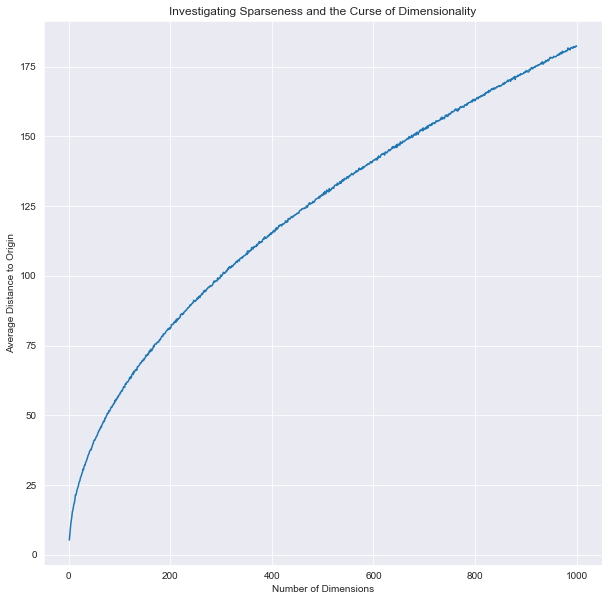

In [1]:
import numpy as np
def euclidean_distance(a, b, c=2):
    return np.power(np.sum(np.power(np.abs(np.array(a) - np.array(b)), c)), 1/c)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
avg_distances = []
for n in range(1, 1001):
    avg_distances.append(np.mean([euclidean_distance(np.random.uniform(low=-10, high=10, size=n), [0 for i in range(n)]) for p in range(100)]))
plt.figure(figsize=(10, 10))
plt.plot(range(1, 1001), avg_distances)
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance to Origin')
plt.title('Investigating Sparseness and the Curse of Dimensionality');

### K-Means Clustering

We start by providing a basic intuition of the K-means clustering algorithm. When using the K-means clustering algorithm, the number of clusters that you want to obtain is specified upfront and the algorithm aims at the most "optimal" cluster centers, given that there are  𝐾  clusters. 
An essential understanding when using clustering methods is that you are basically trying to group data points together without knowing what the actual cluster/classes are. This is also the main distinction between clustering and classification (which is a supervised learning method). This is why technically, you also don't know how many clusters you're looking for.  With non-hierarchical algorithms, there can be no subgroups -- that is, no clusters within clusters.

Clustering techniques are among the most popular unsupervised machine learning algorithms. The main idea behind clustering is that you want to group objects into similar classes, in a way that:
- intra-class similarity is high (similarity amongst members of the same group is high)
- inter-class similarity is low (similarity of different groups is low)

What does similarity mean? You should be thinking of it in terms of distance_, just like we did with the k-nearest-neighbors algorithm. The closer two points are, the more similar they are.

A nonhierarchical algorithm chooses k initial clusters and reassigns observations until no improvement can be obtained. How initial clusters and reassignments are done depends on the specific type of algorithm.

When performing k-means clustering, you're essentially trying to find $k$ cluster centers as the mean of the data points that belong to these clusters. One challenging aspect of k-means is that the number _k_ needs to be decided upon before you start running the algorithm.

The k-means clustering algorithm is an iterative algorithm that reaches for a pre-determined number of clusters within an unlabeled dataset, and basically works as follows:

1. Select $k$ initial seeds 
2. Assign each observation to the cluster to which it is "closest"
3. Recompute the cluster centroids
4. Reassign the observations to one of the clusters according to some rule
5. Stop if there is no reallocation 

Two assumptions are of main importance for the k-means clustering algorithm:

1. To compute the "cluster center", you calculate the (arithmetic) mean of all the points belonging to the cluster.  Each cluster center is recalculated in the beginning of each new iteration   
2. After the cluster center has been recalculated, if a given point is now closer to a different cluster center than the center of its current cluster, then that point is reassigned to the clostest center 

Centroids are randomly assigned at the beginning, and shift with each iteration as they are recalculated to match the center of the points assigned to their cluster. The clustering ends when the centroids find a position in which points are no longer reassigned, meaning that the centroids no longer need to move.

Implementing k-means clustering with scikit-learn is quite simple because the API mirrors the same functionality that we've seen before. The same preprocessing steps used for supervised learning methods are required -- missing values must be dealt with and all data must be in numerical format (meaning that non-numerical columns must be dropped or one-hot encoded). 

```python
from sklearn.cluster import KMeans

# Set number of clusters at initialization time
k_means = KMeans(n_clusters=3) 

# Run the clustering algorithm
k_means.fit(some_df) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(some_df) 

# Cluster predictions for each point are also stored in k_means.labels_
```
http://scikit-learn.org/stable/modules/clustering.html

init specifies the method for initialization:
- k-means++ is the default method, this method selects initial cluster centers in a smart way in order to pursue fast convergence.
- random: choose k random observations for the initial centroids.
- ndarray: you can pass this argument and provide initial centers.

algorithm specifies the algorithm used:
- If full is specified, a full EM-style algorithm is performed. EM is short for "Expectation Maximization" and its name is derived from the nature of the algorithm, where in each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created.
- The EM algorithm can be slow. The elkan variation is more efficient, but not available for sparse data.
The default is auto, and automatically selects full for sparse data and elkan for dense data.

The _variance ratio_ is a ratio of the variance of the points within a cluster, to the variance of a point to points in other clusters. Intuitively, we can understand that we want intra-cluster variance to be low (suggesting that the clusters are tightly knit), and inter-cluster variance to be high (suggesting that there is little to no ambiguity about which cluster the points belong to). 

We can easily calculate the variance ratio by importing a function from scikit-learn to calculate it for us, as shown below. To use this metric, we just need to pass in the points themselves, and the predicted labels given to each point by the clustering algorithm. The higher the score, the better the fit.

```python  
# This code builds on the previous example
from sklearn.metrics import calinski_harabasz_score

# Note that we could also pass in k_means.labels_ instead of cluster_assignments
print(calinski_harabasz_score(some_df, cluster_assignments))
```

There are other metrics that can also be used to evaluate the fitness, such as Silhouette Score. No one metric is best -- they all have slightly different strengths and weaknesses depending on the given dataset and goals. Because of this, it's generally accepted that it's best to pick one metric and stick to it.

Now that we have a way to evaluate how well our clusters fit the dataset, we can use this to find the optimal value for  𝑘 . The best way to do this is to create and fit different k-means clustering objects for every value of  𝑘  that we want to try, and then compare the variance ratio scores for each.

We can then visualize the scores using an Elbow Plot: An elbow plot is a general term for plots like this where we can easily see where we hit a point of diminishing returns. A note on elbow plots: higher scores aren't always better. Higher values of  𝑘  mean introducing more overall complexity

Evaluating Cluster Fitness
Running K-means on a dataset is easy enough, but how do we know if we have the best value for  𝑘 ? The best bet is to use an accepted metric for evaluating cluster fitness such as Calinski Harabasz Score, which is more often referred to by a simpler, Variance Ratio.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

Very similarly to the silhouette coefficient, the Calinski-Harabaz index (`sklearn.metrics.calinski_harabaz_score`) can be used to evaluate the model when class labels are not known a priori. Again, a higher CH score means that the model has better defined clusters.

When you have k clusters, the score s is a ratio of the between-cluster dispersion, and the within-cluster dispersion.

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

Here, the between group dispersion matrix is $B_k$ and the withing dispersion matrix is $W_k$:

$$W_k = \sum^k_{q=1} \sum_{x\in C_q} (x - c_q)(x-c_q)^T$$
$$B_k = \sum_{q} n_q (c_q - c)(c_q-c)^T$$

where 

- $N$ is the data size
- $C_q$ represents the samples in cluster $q$
- $c_q$ represents the center of cluster $q$
- $c$ the center of $E$
- $n_q$ the number of samples in cluster $q$.
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Silhouette Coefficient
If the actual cluster labels are unknown, the model itself must be used for evaluation. When calculating the Silhouette Coefficient, a higher score means that you ended up with a model with better defined clusters. Two scores are used to generate the silhouette coefficient:
- a is the average distance between one data sample and all other points in the same cluster
- b: The average distance between one data sample and all other points in the next nearest cluster.

The silhouette coefficient is then given by:
$$ s = \dfrac{(b-a)}{max(b-a)} $$

The advantages of the k-means clustering approach are:
- Very easy to implement!
- With many features, k-means is usually faster than HAC (as long as  𝑘  is reasonably small)
- Objects are locked into the cluster they are first assigned to and can change as the centroids move around
- Clusters are often tighter than those formed by HAC

However, this algorithm often comes with several disadvantages:
- Quality of results depends on picking the right value for  𝑘 . This can be a problem when we don't know how many clusters to expect in our dataset
- Scaling our dataset will completely change the results
- Initial start points of each centroid have a very strong impact on our final results. A bad start point can cause sub-optimal clusters

### Hierarchical Agglomerative Clustering

A second branch of clustering algorithms is hierarchical agglomerative clustering. Using hierarchical clustering, unlike K-means clustering, you don't decide on the number of clusters beforehand. Instead, you start with  𝑛  clusters, where  𝑛  is the number of data points, and at each step you join two clusters. You stop joining clusters when a certain criterion is reached.

In cluster analysis, an agglomerative hierarchical algorithm starts with n clusters (where n is the number of observations, so each observation is a cluster), then combines the two most similar clusters, combines the next two most similar clusters, and so on. A divisive hierarchical algorithm does the exact opposite, going from 1 to n clusters.
This is where agglomerative clustering algorithms come in. In agglomerative clustering, the algorithm starts with  𝑛  clusters (where  𝑛  is the number of data points) and proceeds by merging the most similar clusters, until some stopping criterion. in scikit-learn, the stopping criterion that is implemented is "number of clusters". If left alone, the algorithm will work until it has merged every cluster into one giant cluster. We can also set the limit, if we want, to stop when there are only [x] clusters remaining.

Several linkage criteria that have different definitions for "most similar clusters" can be used. The measure is always defined between two existing clusters up until that point, so the later in the algorithms, the bigger the clusters get.

Scikit-learn provides three linkage criteria:
- ward (default): picks the two clusters to merge in a way that the variance within all clusters increases the least. Generally, this leads to clusters that are fairly equally sized.
- average: merges the two clusters that have the smallest average distance between all the points.
- complete (or maximum linkage): merges the two clusters that have the smallest maximum distance between their points.

As we'll see in the next lab, these linkage criteria can definitely have an effect on how the clustering algorithm performs. As always seems to be the case, no one of these is "best" -- which one you should use often depends on the structure of your data, and/or your own goals.

we can see that scaling our data had a significant effect on the quality of our clusters.

![heirarchical agglomerative clustering steps](new_hac_iterative.png)

One advantage of HAC is that we can easily visualize the results at any given step using visualizations such as Dendrograms and Clustergrams. Take another look at the gif above, but this time, pay attention to the image on the right. 
This is a dendrogram, which is used to visualize the hierarchical relationship between the various clusters that are computed throughout each step. Dendrograms are very useful to decide how clusters change depending on the euclidian distance. 
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy
Unfortunately, scikit-learn doesn't provide the functionality to create dendrograms. Luckily though, you can easily create them using SciPy. In fact, SciPy provides algorithms for more linkage criteria than scikit-learn does.
```python
from scipy.cluster.hierarchy import dendrogram, ward

# Use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel('Data index')
plt.ylabel('Cluster distance')
plt.show()```

We can also visualize the same information by drawing lines representing each cluster at each step to create a clustergram. 

HAC is useful as a clustering algorithm because:
- It produces an ordered relationship between clusters, which can be useful when visualized
- Smaller clusters are created. This allows us to get a very granular understanding of our dataset, and zoom in at the level where the clusters make the most sense to us

However, this algorithm is also built on some assumptions which can be disadvantages:
- Results are usually dependent upon the distance metric used
- Objects can be grouped 'incorrectly' early on, with no way to relocate them. For instance, consider two points that belong to separate clusters, but are both nearer to each other than the center of the cluster they actually belong to (both are near the "boundary" between their cluster and the opposing cluster). These will be incorrectly grouped as a cluster, which will throw off the clustering of the groups they actually belong to, as well

How HAV works under the hood in sklearn
https://github.com/amueller/mglearn/tree/master/mglearn

See section38/dsc-hierarchical-agglomerative-clustering-codealong-online-ds-pt-081219/index for additional evaluation metric information, along with HAV algorithim visualization.

### Market Segmentation with Clustering

Perhaps the most common use case for clustering algorithms in the real world, **Market Segmentation** refers to using **Cluster Analysis** to segment a customer base into different market segments using the clustering techniques we've learned.
After we've identified the different market segments, the next step is to build individualized strategies to Target them!
The third step in this process is a bit outside the scope of clustering. This is where the marketing team really shines -- figuring out how to position our product to make it both as desirable as possible to a given segment, while also making our product stand out from competitors. Step 3 in this process is usually done with the help of survey data, under the umbrella of User Research. This is not something that data scientists typically have to worry about too much, as it is a different domain of expertise. However, the first two stages are very much something that data scientists can expect to do multiple times in their career!

## Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique. It allows you to compress a dataset into a lower dimensional space with fewer features while maintaining as much of the original information as possible.
PCA can also help improve regression and classification algorithms in many cases. In particular, algorithms are less prone to overfitting when the underlying data itself has first been compressed, reducing noise or other anomalies. Finally, PCA can also be helpful for visualizing the structure of large datasets. After all, you are limited to 2 or 3 dimensions when visualizing data. As such, reducing a dataset to 2 or 3 primary features is monumental in creating a visualization.
Essentially, PCA, or Principal Component Analysis, attempts to capture as much information from the dataset as possible while reducing the overall number of features.

In [5]:
import numpy as np
x1 = np.linspace(-10, 10, 100)
# A linear relationship, plus a little noise
x2 = np.array([xi*2 + np.random.normal(loc=0, scale=0.5) for xi in x1]) 
X = np.matrix(list(zip(x1, x2)))

from sklearn.decomposition import PCA
pca = PCA()
transformed = pca.fit_transform(X)
print(pca.components_)
print(pca.mean_)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[[ 0.44504525  0.89550808]
 [ 0.89550808 -0.44504525]]
[7.10542736e-17 4.56543045e-02]
[9.99651608e-01 3.48392445e-04]
[0.99965161 1.        ]


Let's take a look at what went on here. PCA transforms the dataset along principal axes. The first of these axes is designed to capture the maximum variance within the data. From here, additional axes are constructed which are orthogonal to the previous axes and continue to account for as much of the remaining variance as possible.
Typically, one would use PCA to actually reduce the number of dimensions.
Keep in mind that these quantities are cumulative: principal component 2 attempts to account for the variance not accounted for in the primary component.

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here are the exact steps:
1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features

### Covariance

Covariance is very similar to correlation, but is not normalized. The formula for the covariance of two variables $X$ and $Y$ is:

$$cov(X,Y) = \frac{\sum_i^n(X_i -\mu_X)(Y_i - \mu_Y)}{n-1}$$

In [9]:
# Pulling up the original feature means which were used to center the data
print('Part of Step 1')
print(pca.mean_)
# Pulling up the covariance matrix of the mean centered data
print('\nStep 2')
print(pca.get_covariance())
# Pulling up the eigenvectors of the covariance matrix
print('\nStep 3')
print(pca.components_)

Part of Step 1
[7.10542736e-17 4.56543045e-02]

Step 2
[[ 34.35023637  68.99717301]
 [ 68.99717301 138.89461379]]

Step 3
[[ 0.44504525  0.89550808]
 [ 0.89550808 -0.44504525]]


### Covariance Matrix

The covariance matrix for a set of data with $n$ dimensions would be:

$$C^{n x n} = (c_{i,j}, c_{i,j} = cov(Dim_i, Dim_j))$$

where $C^{n x n}$ is a matrix with $n$ rows and $n$ columns, and $Dim_x$ is the $i$th dimension.

So if you have an n-dimensional dataset, then the matrix has $n$ rows and $n$ columns (square matrix) and each entry in the matrix is the result of calculating the covariance between two separate dimensions as shown below:

![covariance matrix](covmat.png)

Down the main diagonal, we can see that the covariance value is between one of the dimensions and itself. These are the variances for that dimension

Since  𝑐𝑜𝑣(𝑎,𝑏)=𝑐𝑜𝑣(𝑏,𝑎) , the matrix is symmetric about the main diagonal.

In [10]:
import numpy as np
X = np.array([[0.1, 0.3, 0.4, 0.8, 0.9], 
              [3.2, 2.4, 2.4, 0.1, 5.5], 
              [10., 8.2, 4.3, 2.6, 0.9]])
print(X)
print(np.cov(X))
print(np.var(X, axis=1, ddof=1))

[[ 0.1  0.3  0.4  0.8  0.9]
 [ 3.2  2.4  2.4  0.1  5.5]
 [10.   8.2  4.3  2.6  0.9]]
[[ 0.115   0.0575 -1.2325]
 [ 0.0575  3.757  -0.8775]
 [-1.2325 -0.8775 14.525 ]]
[ 0.115  3.757 14.525]


### Eigendecomposition

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that you want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, you decompose the initial matrix into the product of its **eigenvectors** and **eigenvalues**.

A vector  𝑣  is an **eigenvector** of a square matrix  𝐴  if it satisfies the following equation:
- 𝐴𝑣=𝜆𝑣
    - Here, lambda ( 𝜆 ) represents the eigenvalue scalar.
A matrix can have one eigenvector and eigenvalue for each dimension of the parent matrix.
Eigenvectors are unit vectors, with length or magnitude equal to 1.0.
They are often referred to as right vectors, which simply means a column vector (as opposed to a row vector or a left vector). Imagine a transformation matrix that, when multiplied on the left, reflected vectors in the line  𝑦=𝑥 . You can see that if there were a vector that lay on the line  𝑦=𝑥 , it’s reflection is itself. This vector (and all multiples of it), would be an eigenvector of that transformation matrix.

**Eigenvalues** are coefficients applied to eigenvectors that give the vectors their length or magnitude. For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it. Eigenvalues are closely related to eigenvectors.

The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.
- 𝐴=𝑄.𝑑𝑖𝑎𝑔(𝑉).𝑄−1
    - 𝑄  is a matrix comprised of the eigenvectors,  
    - 𝑑𝑖𝑎𝑔(𝑉)  is a diagonal matrix comprised of the eigenvalues along the diagonal (and zeros everywhere else), and  
    - 𝑄−1  is the inverse of the matrix comprised of the eigenvectors.

The eigendecomposition can be calculated in NumPy using the eig() function.

Testing an eigenvector
```python
# Confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
print('-----------------')
C = vectors[:, 0] * values[0]
print(C)```
```python
from numpy.linalg import inv
# Create matrix from eigenvectors
Q = vectors

# Create inverse of eigenvectors matrix
R = inv(Q)

# Create diagonal matrix from eigenvalues
L = np.diag(values)

# Reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)```

Doing PCA
1. Obtain data
2. Subtract the Mean
Next, you have to subtract the mean from each dimension of the data.
```python
data.mean()
mean_centered = data - data.mean()
mean_centered.head()```
3. Calculate the covariance matrix
Now that you have normalized your data, you can calculate the covariance matrix.
```python 
cov = np.cov([mean_centered['x1'], mean_centered['x2']])
cov```
4. Calculate the eigenvectors and eigenvalues of the covariance matrix
Compute the associated eigenvectors. These will form the new axes when it's time to reproject the dataset on the new basis.
```python
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector```
5. Choosing components and forming a feature vector
 In fact, it turns out that the eigenvector with the highest eigenvalue is the principal component of the dataset.
 In general, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue in descending order. This gives us the components in order of significance. Typically, PCA will be used to reduce the dimensionality of the dataset and as such, some of these eigenvectors will be subsequently discarded. In general, the smaller the eigenvalue relative to others, the less information encoded within said feature.
Finally, you need to form a feature vector, which is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors that you want to keep from the list of eigenvectors, and forming a matrix with these eigenvectors in the columns as shown below:
```python
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eigen_value)[::-1] 

# Sort
eigenvectors_sorted = eigen_vector[:, e_indices]
eigenvectors_sorted```
6. Deriving the new dataset
```python
transformed = eigenvectors_sorted.dot(mean_centered.T).T
transformed[:5]```

# Semi-Supervised Learning

A more advanced, but similar use case is to then use these market segments to create look-alike models to help us identify more customers or market segments that we can plausibly assume are equally valuable, due to their similarity with valuable customers or market segments we've already identified.
This is where look-alike modeling comes in. A look-alike model uses a distance metric of our choice to rate the similarity of each customer in our group of unknowns to customers in our known, valuable group.
In the real-world, using look-alike models to find other customers that could potentially be valuable to us is often referred to as prospecting. Viewed in terms of the infographic above, we would choose direct resources to market to the customers that look like our valuable customers to increase our top-of-funnel, meaning that we are trying to increase the number of potential customers that haven't shown interest in our product or company yet but are likely to, due to their similarity to customers that already have.

The main idea behind semi-supervised learning is to generate pseudo-labels that are possibly correct (at least better than random chance). To do this, we don't usually use clustering algorithms -- instead, we use our supervised learning algorithms in an unsupervised way.
Supervised learning typically follows a set pattern:
1. Train your model on your labeled training data. In the case of our example above, we would build the best model possible with our tiny dataset of 5,000 labeled examples.
2. Use your trained model to generate pseudo-labels for your unlabeled data. This means having our trained model make predictions on our 95,000 unlabeled examples. Since our trained model does better than random chance, this means that our generated pseudo-labels will be at least somewhat more correct than random chance. We can even put a number to this, by looking at the performance our trained model had on the test set. For example, if our trained model had an accuracy of ~70%, then we can assume that ~70% of the pseudo-labels will be correct, ~30% will be incorrect.
3. Combine your labeled data and your pseudo-labeled data into a single, new dataset.. This means that we concatenate all our labeled data of 5,000 examples with the 95,000 pseudo-labeled examples.
4. Retrain your model on the new dataset. Although some of the pseudo-labeled data will certainly be wrong, it's likely that the amount that is correct will be more useful, and the signal that these correctly pseudo-labeled examples provide will outweigh the incorrectly labeled ones, thereby resulting in better overall model performance.

If semi-supervised learning sounds a bit risky to you, you're not wrong. When done correctly, semi-supervised learning can increase overall model performance by opening up access to much more data than we would have access to, and more data almost always results in better performance, but without the exorbitant costs of paying to have humans generate labels for the data needed.

Drawbacks
But what happens when our dataset is extremely noisy to begin with? In that case, our incorrect pseudo-labels may skew the model by introducing more "noise" than "signal". This is partially because we can end up in a feedback loop of sorts. Think about an example where the model has generated an incorrect pseudo-label. If a model trained only on the real data with no pseudo-labels got this example wrong, then what happens when you train the model on the same example, but this time provide a pseudo-label that "confirms" this incorrect belief? When done correctly, we can hope that the signal provided by all the correctly pseudo-labeled examples will generalize to help the model correct its mistakes on the ones it got wrong. However, if the dataset is noisy, or the original model wasn't that good to begin with (or both), then it can be quite likely that we are introducing even more incorrect information than correct information, moving the model in the wrong direction.

So how do we make sure that we're not making these mistakes when using a semi-supervised approach? Use a holdout set! You should definitely have a test set that the model has never seen before to check the performance of your semi-supervised model. Obviously, make sure that your test set only contains actual, ground-truth labeled examples, no pseudo-labels allowed!